In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statistics 

In [3]:
df = pd.read_csv('D:/belajar/vidio.csv', error_bad_lines=False)
print(df)

b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

                                          hash_content_id  \
0       003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...   
1       0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
2       0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
3       0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
4       0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
...                                                   ...   
742577  ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...   
742578  ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...   
742579  ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...   
742580  ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...   
742581  ffc5d15ea688cbc179b834d6ade46f32706304f521a673...   

                                             hash_play_id  \
0       515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...   
1       047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...   
2       2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...   
3       4850defe8308149

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_film_id       40525 non-null   object 
 5   hash_event_id      742582 non-null  object 
 6   is_login           742582 non-null  bool   
 7   playback_location  742582 non-null  object 
 8   platform           742582 non-null  object 
 9   play_time          742582 non-null  object 
 10  end_time           742582 non-null  object 
 11  referrer           702119 non-null  object 
 12  average_bitrate    707495 non-null  float64
 13  bitrate_range      742582 non-null  object 
 14  total_bytes        742582 non-null  int64  
 15  buffer_duration    742582 non-null  float64
 16  re

In [10]:
df_stat = df.describe()
df_stat.loc['kurtosis'] = df[['buffer_duration','play_duration']].kurt()
df_stat.loc['skewness'] = df[['buffer_duration','play_duration']].skew()
df_stat.loc['variance'] = df[['buffer_duration','play_duration']].var()
df_stat.round(2)

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,707495.00,7.425820e+05,7.425820e+05,0.0,742582.00
mean,199515.37,8.040253e+07,4.072600e+02,NaN,433.07
std,141363.15,5.136991e+08,7.188516e+04,NaN,1651.24
min,144.00,0.000000e+00,-4.640000e+00,NaN,0.00
25%,625.00,7.500000e+02,1.000000e-02,NaN,3.00
50%,300000.00,5.062500e+05,1.000000e+00,NaN,40.00
75%,300000.00,1.125000e+07,6.000000e+00,NaN,120.00
max,300000.00,5.065312e+10,6.117224e+07,NaN,135075.00
kurtosis,NaN,NaN,7.062014e+05,NaN,418.23
skewness,NaN,NaN,8.306300e+02,NaN,14.11


In [7]:
df[df['play_duration']==0]

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
7,010883cf416654b1c0210eb98052c8bbc4145639505cae...,5a0e55ce6a19d5db4480b85d170ae475c28f334213b841...,fb6a9fbb2a88d85b63ef639a49d07e69e5841ee957189f...,ba4c27deedb0041164dd2d1f153268c881450a19750038...,NaN,bcb01821cefc3be9c4d3834739c49743246d593914f90b...,True,direct,app-android,2020-02-15T09:06:00.000Z,...,4.24.9-403fc76 (3188606),NaN,0,vod,NaN,Nanti Kita Cerita Tentang Pukis Nangka | FTV SCTV,Movies,NaN,NaN,NaN
12,011509fa3e741567bf3b9f776f5175654d31384c103de0...,05d9d8af3e01ff6902b1fd24854b69efcf5b92056dd491...,18837e2b0eb89979c47463138aaa72d8c90df1488f61ef...,b9ae6cb3ccdb5d3a91a6b981cb9ae6bc5bc4958421d36b...,NaN,2c1eb0131a2ecd00bf41e1b820f8708d63e4254525cda3...,False,embed,web-mobile,2020-02-15T12:11:51.000Z,...,NaN,NaN,0,vod,NaN,"Lucinta Luna Buka Suara, Menangis Penuh Penyes...",Entertainment,NaN,NaN,NaN
23,011509fa3e741567bf3b9f776f5175654d31384c103de0...,1fb8512023617cadf6c8c30cf3720af9d3c3af8d58ebf6...,32a4c469efc0f490a3ba28e774e84a96711dddb699cbb1...,dad95d3eb16b864e8736542ad79fd93824ce321d087f40...,NaN,ccd54aa312c201cb7d4d9d8830f9b905fe73f609aeccdb...,False,embed,web-mobile,2020-02-15T15:46:03.000Z,...,NaN,NaN,0,vod,NaN,"Lucinta Luna Buka Suara, Menangis Penuh Penyes...",Entertainment,NaN,NaN,NaN
34,011509fa3e741567bf3b9f776f5175654d31384c103de0...,3e337ae3e740ebb68bf6f03dcce387cfdae69d73b5a0c2...,8289919f37571fe2a16b1484f3fed8ae6dc4c90708eccf...,32456c32b5e754f560e7ddf84df37b64dd145ee6d2c5b7...,NaN,7807491d52f05a7163c72ae48d1fca1f30fc0987d23d05...,False,embed,web-mobile,2020-02-15T05:24:59.000Z,...,NaN,NaN,0,vod,NaN,"Lucinta Luna Buka Suara, Menangis Penuh Penyes...",Entertainment,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742557,fce08bae9a5dc879b5f6abd2fec69f380cc8005e411278...,2574fbf9cbb0d233e57b806070b027348cd5a5881dafee...,7b0e7d4b4786809a11715448cb2093fe7529f2ef4f7a90...,c296d4dedfc459f3dc119df6028e3541fdcde3fca739bd...,NaN,77f08d09811d06009ce16f4adbc725459ea0f8e640b4da...,False,embed,web-mobile,2020-02-09T14:31:17.000Z,...,NaN,NaN,0,vod,NaN,Tim Putri Jakarta Pertamina Energi Juarai Prol...,News,NaN,NaN,NaN
742561,fdb4ec85c164caa306e9fa39e40d696727189e95a84ce7...,b90a6b7d35e464b63f89fc1c607ca9cdce15b22b065212...,9e9e580a99559b007d581a90fd2343b10a699621943043...,8e71e6c19268f40affdd3f7029f853731a90a68d67ef1d...,NaN,441aeb4825f313282803a362694f9f325d46ecaf03d71d...,True,direct,app-android,2020-02-08T17:06:30.000Z,...,4.23.13-b3b0f90 (3188596),NaN,0,vod,NaN,Lucu Banget Cinta Buatin Baju Buat Samudra!! -...,TV Show,NaN,NaN,NaN
742563,fe05e19fa7785cc638b29fa2a62ce5205ddaab16c5ecc2...,974bb8ed628a9e49ef2cf13d523014e86c24a4e6a543ca...,d30eb77080bd517f618a756eb93fa39d18018abb38e569...,f0ed64fe601217733802af153ab47a62eee3ce5b3ba95c...,NaN,2143b1bc626cbb78d5ea1f12e30e4e469bcc6f03c9cc12...,False,direct,web-mobile,2020-02-09T15:04:15.000Z,...,NaN,NaN,0,vod,NaN,"Menyakitkan, Cinta Diminta Jauhi Samudra | Sam...",TV Show,NaN,NaN,NaN
742566,fe3e0fc474d9f9773f44eeab1772c9e755a18f6c6ef380...,ec0b57059e314a375de7c46b1e94dc958e01f26e55cd00...,307387fb295f16326aedfe2def5eb75a94b68ca663bb05...,58f2648c1c965995eda1c3119d43915b4b6d283e88cb8b...,NaN,2bd89df129154561a20d700be0ea2ecbd8098283e49d6b...,False,embed,web-mobile,2020-02-09T14:59:14.000Z,...,NaN,NaN,0,vod,NaN,"Desember Penuh Hujan Meteor, Begini Cara Melih...",News,NaN,NaN,NaN


In [8]:
dfcut = df[df['play_duration']!=0]

df_stat = dfcut.describe()
df_stat.loc['kurtosis'] = df[['buffer_duration','play_duration']].kurt()
df_stat.loc['skewness'] = df[['buffer_duration','play_duration']].skew()
df_stat.loc['variance'] = df[['buffer_duration','play_duration']].var()
df_stat.round(2)

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,564861.00,5.648610e+05,5.648610e+05,0.0,564861.00
mean,204376.62,1.056993e+08,3.514600e+02,NaN,569.33
std,139569.98,5.867190e+08,1.271705e+04,NaN,1872.67
min,144.00,1.800000e+02,-4.640000e+00,NaN,1.00
25%,700.00,5.032500e+04,1.400000e-01,NaN,29.00
50%,300000.00,2.025000e+06,1.630000e+00,NaN,60.00
75%,300000.00,2.250000e+07,7.200000e+00,NaN,240.00
max,300000.00,5.065312e+10,4.170141e+06,NaN,135075.00
kurtosis,NaN,NaN,7.062014e+05,NaN,418.23
skewness,NaN,NaN,8.306300e+02,NaN,14.11


In [11]:
dfcut[['play_time','is_login','platform','completed','os_name','is_premium','category_name','playback_location']].describe()

,play_time,is_login,platform,completed,os_name,is_premium,category_name,playback_location
count,564861,564861,564861,328928,366761,564861,328928,564861
unique,436978,2,7,2,15,2,15,2
top,2020-02-14T13:50:47.000Z,False,web-mobile,False,Android,False,News,direct
freq,9,416959,308092,213086,285325,559702,112536,298343


In [16]:
df1 = df[['hash_play_id','play_time']]
df1

,hash_play_id,play_time
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,2020-02-15T12:07:00.000Z
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,2020-02-14T18:37:52.000Z
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,2020-02-15T11:58:24.000Z
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,2020-02-15T06:36:08.000Z
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,2020-02-15T01:53:03.000Z
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,2020-02-09T10:51:23.000Z
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,2020-02-09T02:49:03.000Z
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,2020-02-09T08:57:13.000Z
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,2020-02-09T03:57:42.000Z


In [23]:
df1['day'] = df1['play_time'] = df1['play_time'].dt.strftime('%Y-%m-%d')
df1

,hash_play_id,play_time,day
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,2020-02-15,2020-02-15
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,2020-02-14,2020-02-14
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,2020-02-15,2020-02-15
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,2020-02-15,2020-02-15
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,2020-02-15,2020-02-15
...,...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,2020-02-09,2020-02-09
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,2020-02-09,2020-02-09
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,2020-02-09,2020-02-09
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,2020-02-09,2020-02-09


In [24]:
df1a = df1.groupby('day')['hash_play_id'].agg('count').reset_index()
df1a.sort_values(by='day',ascending=True,inplace=True)
df1a

,day,hash_play_id
0,2020-02-01,6835
1,2020-02-02,45949
2,2020-02-03,47621
3,2020-02-04,48278
4,2020-02-05,45711
5,2020-02-06,48659
6,2020-02-07,48233
7,2020-02-08,44533
8,2020-02-09,46245
9,2020-02-10,54571


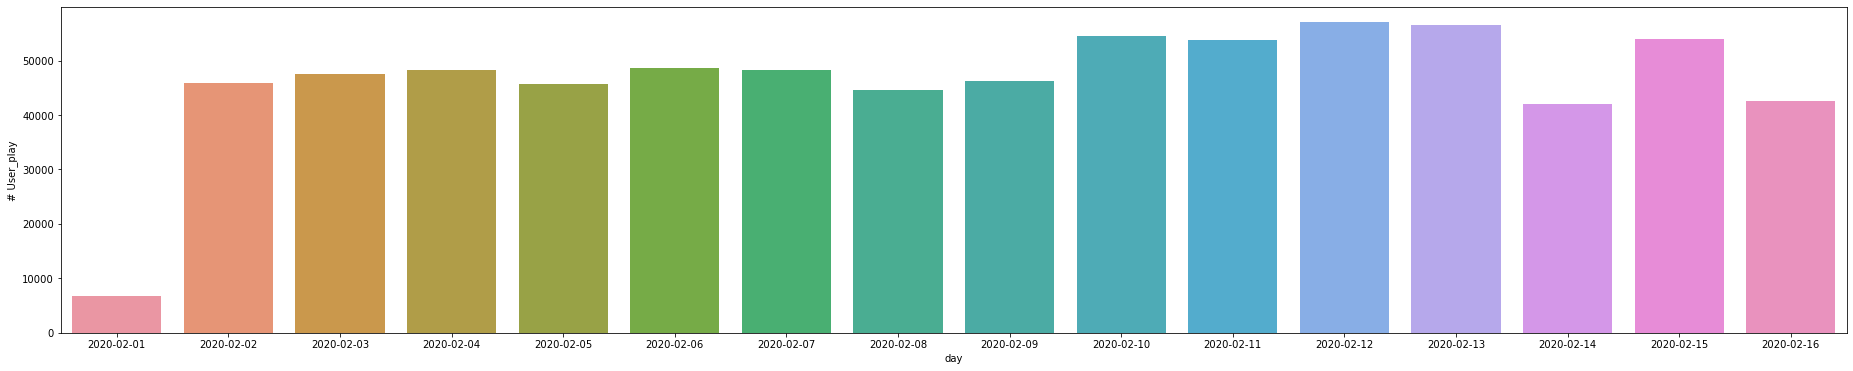

In [30]:
df1a.columns = ['day','# User_play']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(32,6), sharey=True)
#sns.barplot(x='day',y='# play',data=df1a[0:3],ci=None,ax=axes[0])
sns.barplot(x='day',y='# User_play',data=df1a[:16],ci=None)
#sns.barplot(x='day',y='# play',data=df1a[15:25],ci=None,ax=axes[2])

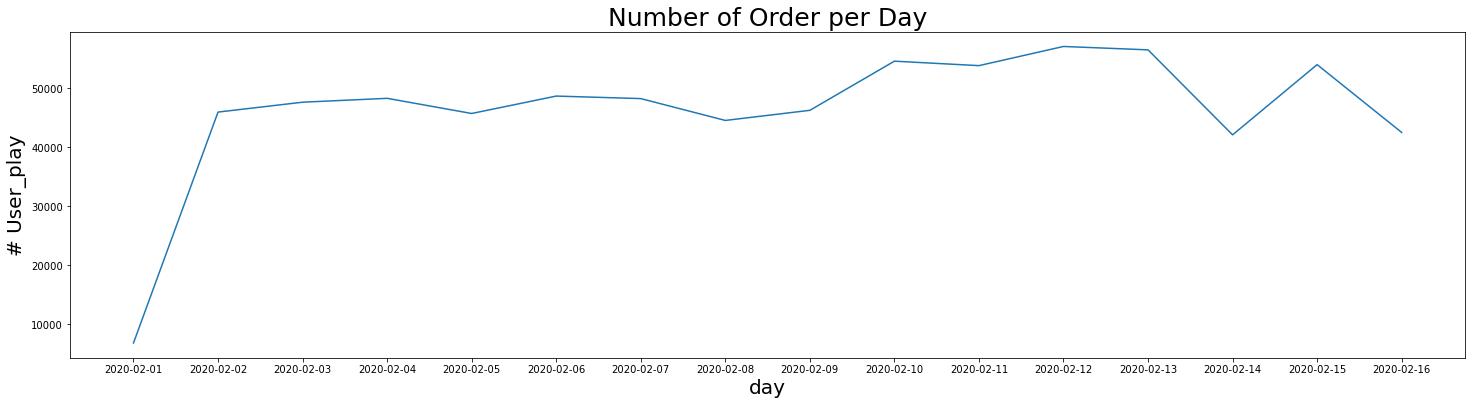

In [56]:
plt.figure(figsize=(25,6))
plt.title('Number of Order per Day',fontsize=25)
plt.xlabel('day',fontsize=20)
plt.ylabel('# User_play',fontsize=20)

x = df1a['day']
y = df1a['# User_play']

plt.plot(x,y)
plt.show()

# mencari durasi nonton terbanyak perharinya

In [55]:
df2 = df[['play_duration','play_time']]
df2

,play_duration,play_time
0,1263,2020-02-15T12:07:00.000Z
1,0,2020-02-14T18:37:52.000Z
2,8,2020-02-15T11:58:24.000Z
3,53,2020-02-15T06:36:08.000Z
4,53,2020-02-15T01:53:03.000Z
...,...,...
742577,38,2020-02-09T10:51:23.000Z
742578,5,2020-02-09T02:49:03.000Z
742579,3,2020-02-09T08:57:13.000Z
742580,8,2020-02-09T03:57:42.000Z


In [58]:
df2['play_time'] = df2['play_time'].dt.strftime('%Y-%m-%d')
df2['day'] = df2['play_time']
df2

,play_duration,play_time,day
0,1263,2020-02-15,2020-02-15
1,0,2020-02-14,2020-02-14
2,8,2020-02-15,2020-02-15
3,53,2020-02-15,2020-02-15
4,53,2020-02-15,2020-02-15
...,...,...,...
742577,38,2020-02-09,2020-02-09
742578,5,2020-02-09,2020-02-09
742579,3,2020-02-09,2020-02-09
742580,8,2020-02-09,2020-02-09


In [59]:
df2a = df2.groupby('day')['play_duration'].agg('sum').reset_index()
df2a.sort_values(by='day',ascending=True,inplace=True)
df2a

,day,play_duration
0,2020-02-01,3733127
1,2020-02-02,23087517
2,2020-02-03,23965004
3,2020-02-04,21056158
4,2020-02-05,20720820
5,2020-02-06,21784921
6,2020-02-07,20382029
7,2020-02-08,20568434
8,2020-02-09,21743618
9,2020-02-10,24633211


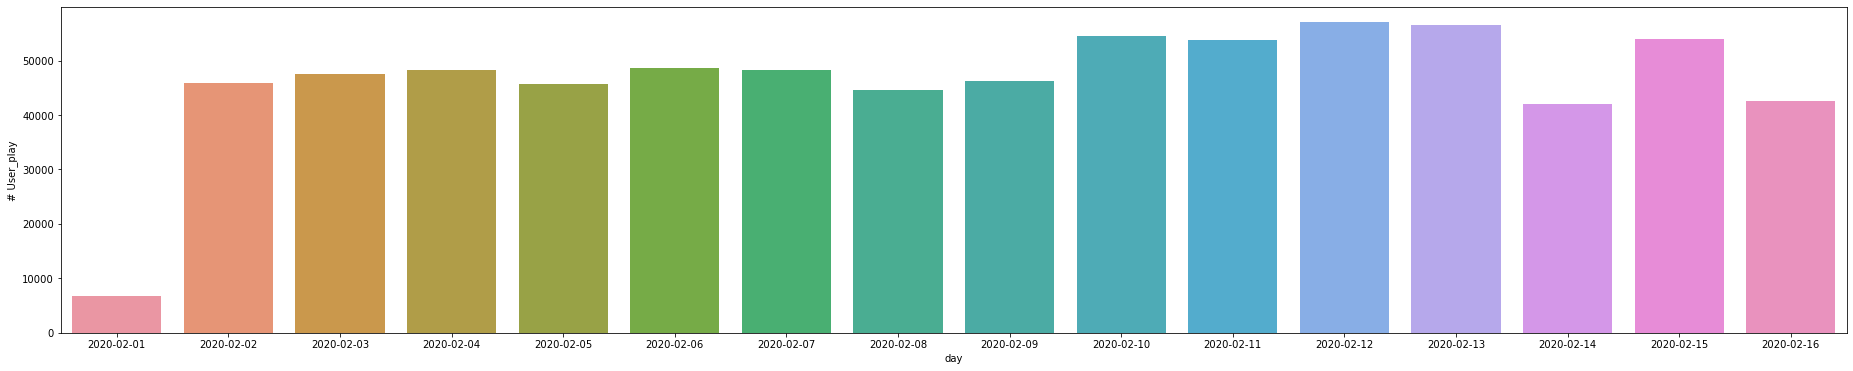

In [61]:
df2a.columns = ['day','# User_play']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(32,6), sharey=True)
#sns.barplot(x='month',y='# play',data=df1a[0:3],ci=None,ax=axes[0])
sns.barplot(x='day',y='# User_play',data=df1a[:16],ci=None)
#sns.barplot(x='month',y='# play',data=df1a[15:25],ci=None,ax=axes[2])

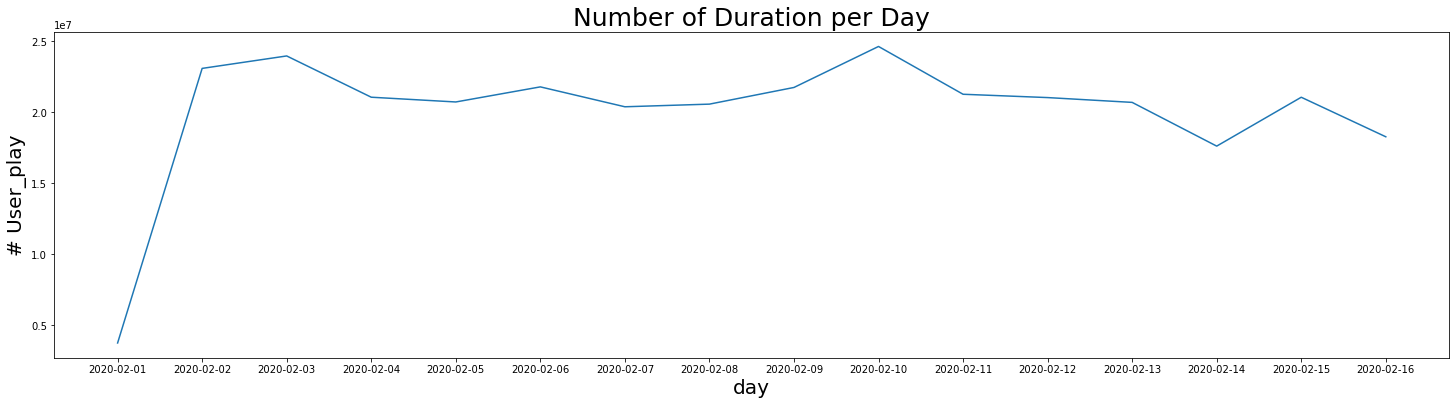

In [62]:
plt.figure(figsize=(25,6))
plt.title('Number of Duration per Day',fontsize=25)
plt.xlabel('day',fontsize=20)
plt.ylabel('# User_play',fontsize=20)

x = df2a['day']
y = df2a['# User_play']

plt.plot(x,y)
plt.show()

# membuat piechart untuk platform

In [58]:
df3 =  df[['hash_play_id','platform']]
df3

,hash_play_id,platform
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,tv-android
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,web-mobile
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,web-mobile
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,web-mobile
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,web-mobile
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,web-mobile
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,web-mobile
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,web-mobile
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,web-mobile


In [59]:
df3a = df3.groupby(['platform'])['hash_play_id'].agg('count').reset_index()
df3a.columns = ['platform','# play_id']
df3a.sort_values(by='# play_id',ascending=False,inplace=True)
df3a

,platform,# play_id
6,web-mobile,428312
0,app-android,180778
5,web-desktop,71340
2,tv-android,41379
1,app-ios,12552
3,tv-tizen,7053
4,tv-webos,1168


In [60]:
df3b = df3a[df3a['platform']!='not_defined']
df3b.reset_index()
df3b

,platform,# play_id
6,web-mobile,428312
0,app-android,180778
5,web-desktop,71340
2,tv-android,41379
1,app-ios,12552
3,tv-tizen,7053
4,tv-webos,1168


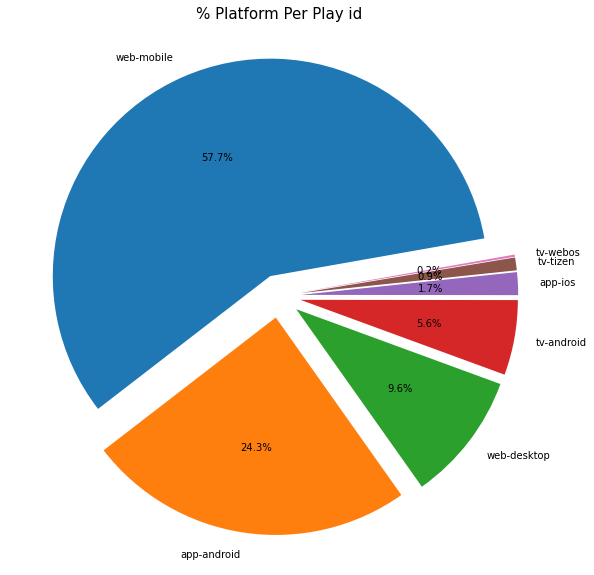

In [106]:
plt.figure(figsize=(10,10))
plt.title('% Platform Per Play id',fontsize=15)
plt.pie(df3b['# play_id'],labels=df3b['platform'],explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# membuat piechart untuk Genre

In [64]:
df4 =  df[['hash_play_id','category_name']]
df4

,hash_play_id,category_name
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,Movies
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,News
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,News
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,News
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,News
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,News
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,News
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,News
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,News


In [68]:
df4a = df4.groupby(['category_name'])['hash_play_id'].agg('count').reset_index()
df4a.columns = ['category_name','# play_id']
df4a.sort_values(by='# play_id',ascending=False,inplace=True)
df4a

,category_name,# play_id
2,Entertainment,152818
10,News,147098
11,Sports,53969
8,Movies,39928
12,TV Show,30181
9,Music,16993
13,Vlog,11966
7,Lifestyle,9498
3,Funny,3321
1,Education,2672


In [70]:
df4b = df4a[df4a['category_name']!='not_defined']
df4b.reset_index()
df4b

,category_name,# play_id
2,Entertainment,152818
10,News,147098
11,Sports,53969
8,Movies,39928
12,TV Show,30181
9,Music,16993
13,Vlog,11966
7,Lifestyle,9498
3,Funny,3321
1,Education,2672


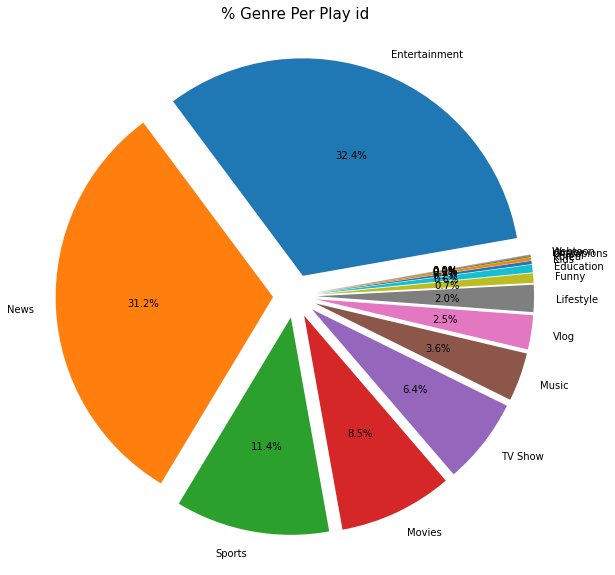

In [105]:
plt.figure(figsize=(10,10))
plt.title('% Genre Per Play id',fontsize=15)
plt.pie(df4b['# play_id'],labels=df4b['category_name'],explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# membuat piechart untuk Conten type

In [73]:
df5 =  df[['hash_play_id','content_type']]
df5

,hash_play_id,content_type
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,vod
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,vod
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,vod
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,vod
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,vod
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,vod
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,vod
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,vod
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,vod


In [74]:
df5a = df5.groupby(['content_type'])['hash_play_id'].agg('count').reset_index()
df5a.columns = ['content_type','# play_id']
df5a.sort_values(by='# play_id',ascending=False,inplace=True)
df5a

,content_type,# play_id
2,vod,468714
1,livestreaming,271020
0,catchup,2848


In [78]:
df5b = df5a[df5a['content_type']!='not_defined']
df5b.reset_index()
df5b

,content_type,# play_id
2,vod,468714
1,livestreaming,271020
0,catchup,2848


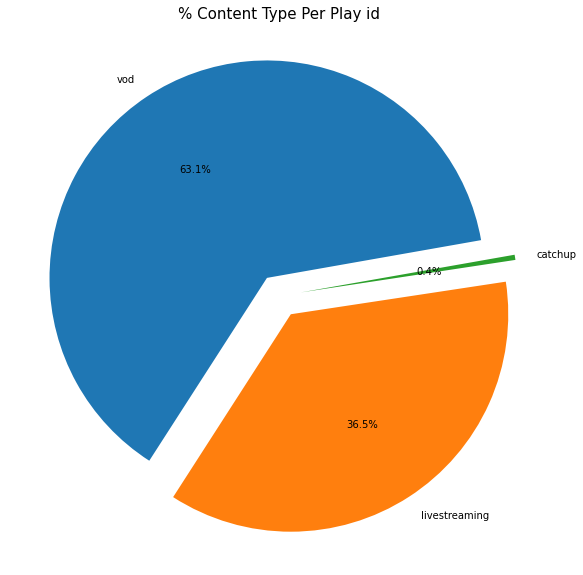

In [104]:
plt.figure(figsize=(10,10))
plt.title('% Content Type Per Play id',fontsize=15)
plt.pie(df5b['# play_id'],labels=df5b['content_type'],explode=[0.1,0.1,0.1],autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# membuat piechart untuk OS 

In [66]:
df6 =  df[['hash_play_id','os_name']]
df6

,hash_play_id,os_name
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,NaN
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,Android
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,Android
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,Android
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,Android
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,Android
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,Android
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,Android
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,Android


In [67]:
df6a = df6.groupby(['os_name'])['hash_play_id'].agg('count').reset_index()
df6a.columns = ['os_name','# play_id']
df6a.sort_values(by='# play_id',ascending=False,inplace=True)
df6a

,os_name,# play_id
0,Android,402118
13,Windows,66203
15,iOS,26709
8,REL,7606
6,Mac OS X,2947
5,Linux,1080
11,Tizen,230
12,Ubuntu,163
7,Other,101
2,Chrome OS,71


In [70]:
df6b = df6a[df6a['os_name']!='not_defined']
df6b.reset_index()
df6b

,os_name,# play_id
0,Android,402118
13,Windows,66203
15,iOS,26709
8,REL,7606
6,Mac OS X,2947
5,Linux,1080
11,Tizen,230
12,Ubuntu,163
7,Other,101
2,Chrome OS,71


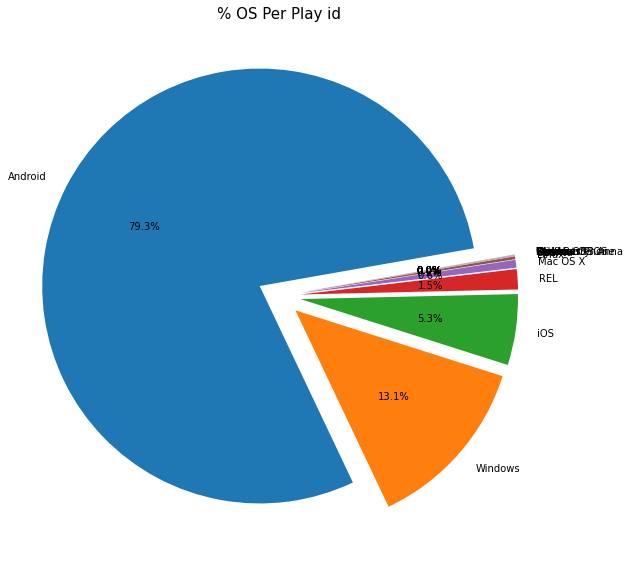

In [71]:
plt.figure(figsize=(10,10))
plt.title('% OS Per Play id',fontsize=15)
plt.pie(df6b['# play_id'],labels=df6b['os_name'],explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# membuat piechart untuk Premium/tidak

In [84]:
df7 =  df[['hash_play_id','is_premium']]
df7

,hash_play_id,is_premium
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,False
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,False
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,False
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,False
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,False
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,False
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,False
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,False
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,False


In [85]:
df7a = df7.groupby(['is_premium'])['hash_play_id'].agg('count').reset_index()
df7a.columns = ['is_premium','# play_id']
df7a.sort_values(by='# play_id',ascending=False,inplace=True)
df7a

,is_premium,# play_id
0,False,736174
1,True,6408


In [86]:
df7b = df7a[df7a['is_premium']!='not_defined']
df7b.reset_index()
df7b

,is_premium,# play_id
0,False,736174
1,True,6408


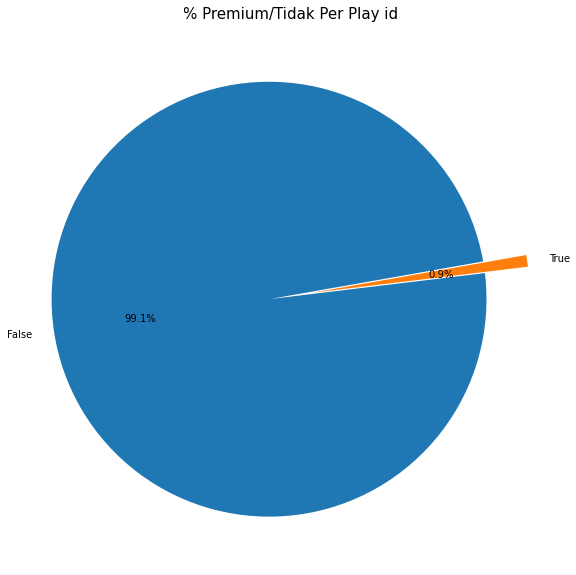

In [100]:
plt.figure(figsize=(10,10))
plt.title('% Premium/Tidak Per Play id',fontsize=15)
plt.pie(df7b['# play_id'],labels=df7b['is_premium'],explode=[0.1,0.1], autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# membuat piechart untuk Menonton dengan selesai/tidak

In [88]:
df8 =  df[['hash_play_id','completed']]
df8

,hash_play_id,completed
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,False
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,False
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,False
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,True
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,True
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,False
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,False
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,False
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,False


In [89]:
df8a = df8.groupby(['completed'])['hash_play_id'].agg('count').reset_index()
df8a.columns = ['completed','# play_id']
df8a.sort_values(by='# play_id',ascending=False,inplace=True)
df8a

,completed,# play_id
0,False,355720
1,True,115842


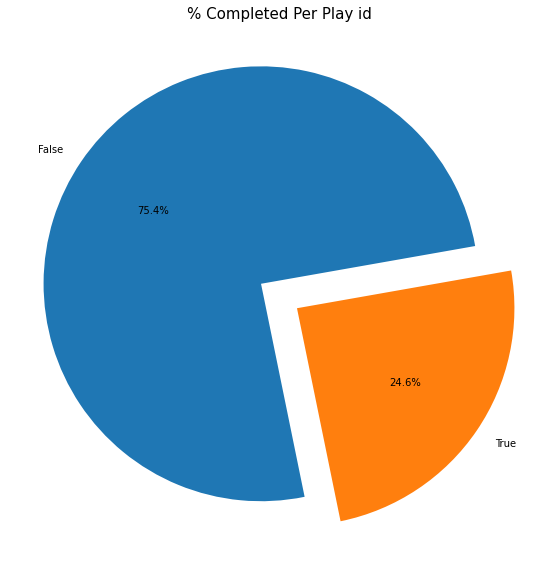

In [99]:
plt.figure(figsize=(10,10))
plt.title('% Completed Per Play id',fontsize=15)
plt.pie(df8a['# play_id'],labels=df8a['completed'],explode=[0.1,0.1], autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# membuat piechart untuk Playback

In [91]:
df9 =  df[['hash_play_id','playback_location']]
df9

,hash_play_id,playback_location
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,direct
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,embed
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,embed
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,embed
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,embed
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,embed
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,embed
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,embed
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,embed


In [92]:
df9a = df9.groupby(['playback_location'])['hash_play_id'].agg('count').reset_index()
df9a.columns = ['playback_location','# play_id']
df9a.sort_values(by='# play_id',ascending=False,inplace=True)
df9a

,playback_location,# play_id
1,embed,376736
0,direct,365846


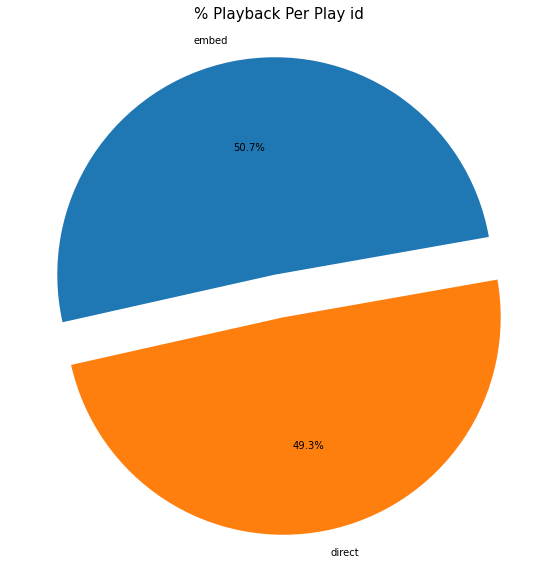

In [98]:
plt.figure(figsize=(10,10))
plt.title('% Playback Per Play id',fontsize=15)
plt.pie(df9a['# play_id'],labels=df9a['playback_location'],explode=[0.1,0.1], autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# membuat piechart untuk Login

In [63]:
df10 =  df[['hash_play_id','is_login']]
df10

,hash_play_id,is_login
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,True
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,False
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,False
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,False
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,False
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,False
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,False
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,False
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,False


In [64]:
df10a = df10.groupby(['is_login'])['hash_play_id'].agg('count').reset_index()
df10a.columns = ['is_login','# play_id']
df10a.sort_values(by='# play_id',ascending=False,inplace=True)
df10a

,is_login,# play_id
0,False,572330
1,True,170252


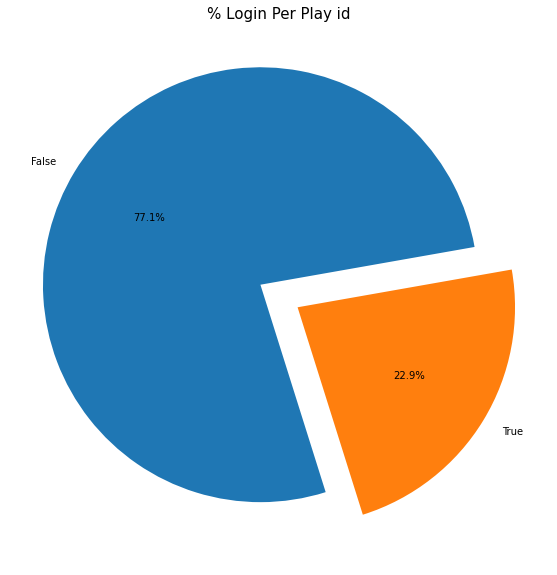

In [65]:
plt.figure(figsize=(10,10))
plt.title('% Login Per Play id',fontsize=15)
plt.pie(df10a['# play_id'],labels=df10a['is_login'],explode=[0.1,0.1],autopct='%1.1f%%',  shadow=False, startangle=10)

plt.show()

# Melihat waktu menonton user

In [108]:
df11 = df[['hash_play_id','play_time']]
df11

,hash_play_id,play_time
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,2020-02-15 12:07:00+00:00
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,2020-02-14 18:37:52+00:00
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,2020-02-15 11:58:24+00:00
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,2020-02-15 06:36:08+00:00
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,2020-02-15 01:53:03+00:00
...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,2020-02-09 10:51:23+00:00
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,2020-02-09 02:49:03+00:00
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,2020-02-09 08:57:13+00:00
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,2020-02-09 03:57:42+00:00


In [112]:
df11['hours'] = df11['play_time'] = df['play_time'].dt.strftime('%H')
df11


,hash_play_id,play_time,hours
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,12,12
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,18,18
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,11,11
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,06,06
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,01,01
...,...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,10,10
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,02,02
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,08,08
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,03,03


In [113]:
df11['hours'] = pd.to_numeric(df11['hours'])
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   hash_play_id  742582 non-null  object
 1   play_time     742582 non-null  object
 2   hours         742582 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 17.0+ MB


In [115]:
def time_day (i) :
  if 0 <= i <= 6:
    time_day = 'midnight'
  elif 7 <= i <= 10 :
    time_day = 'morning'
  elif 11 <= i <= 14 :
    time_day = 'afternoon'
  elif 15 <= i <= 18 :
    time_day = 'evening'
  elif 19 <= i <= 23 :
    time_day = 'night'
  return (time_day)

df11['timeday'] = df11['hours'].apply(time_day)
df11

,hash_play_id,play_time,hours,timeday
0,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,12,12,afternoon
1,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,18,18,evening
2,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,11,11,afternoon
3,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,06,6,midnight
4,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,01,1,midnight
...,...,...,...,...
742577,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,10,10,morning
742578,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,02,2,midnight
742579,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,08,8,morning
742580,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,03,3,midnight


In [116]:
df11a = df11.groupby(['timeday'])['hash_play_id'].agg('count').reset_index()
df11a

,timeday,hash_play_id
0,afternoon,207018
1,evening,108406
2,midnight,221732
3,morning,145061
4,night,60365


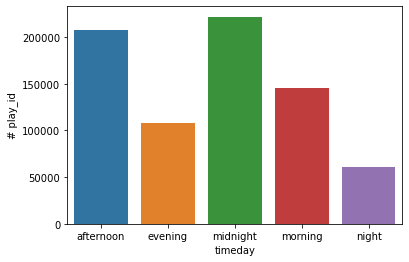

In [117]:
df11a.columns = ['timeday','# play_id']
ax = sns.barplot(x='timeday',y='# play_id',data=df11a,ci=None)